## Making a Convolutional Neural Network in Python

For the first part of the summer, we'll be training a neural network to recognize handwritten digits. We'll be doing this for a few reasons:

1. This will help us to learn Python, a programming language that is incredibly important in day-to-day research and science. 

2. This will help us learn to use *libraries*, or Python code that has been written for us to use. This way, we don't have to start from the ground-up! We'll use Numerical Python, or "NumPy", which will handle math and some other functions for us. We'll also use PyTorch, written as "torch", which will help us to load images, create and train a neural network, and test how accurate the NN is.

3. Although the handwriting-recognition (HR-REC) tutorial is already written, we don't have a tutorial for training the neural network on neutrino interactions. We'll need your help with this, as scientific research doesn't often come with instructions!


## Ready to start?


# Part 1: Getting a dataset and looking at the contents

*Remember: coding is hard! It's a new language. If you understand everything fully, then you understand more than I do! If something doesn't make sense, keep trying and make sure to use resources such as google (particularly StackOverflow) and ask us questions.*

We'll start by importing this *handwrite_functions* file. It's not a real library, but instead a file I wrote that contains functions that you won't need to parse. When we do the following:

`from <file> import *`

Python acts as if we wrote all these functions in the current notebook. If we come across a function that doesn't look familiar to you, check the `handwrite_functions.py` file to see if it's there.

In [1]:
# import libraries and some functions that are written for you 
from handwrite_functions import *

Now, we'll *define variables* that tell us where to save our dataset. This will be a folder relative to the current directory. 

In [2]:
# where you want to save your dataset
dataset = 'MY_DATASET'
testset = 'MY_TESTSET'

PyTorch - the library we are using to make the NN - uses and operates on *tensors*. Tensors look like a bunch of different things, but here's an example. Say we want to do the following two equations:


$$5 \text{ apples} + 6 \text{ apples} = ? $$
$$2 \text{ oranges} + 3 \text{ oranges} = ? $$

To solve these equations, it won't take us much time - we'd do the first one, then the second one. But what if the math was much more complicated? Or, what if we needed to do these calculations with grapefruits, and kumquats, and cherries, and ...


Enter a 2-dimensional tensor (if this looks familiar to you, you might be familiar with matrices, a type of tensor). We can put these values in the tensor to do both of the operations at once. 

$$
\begin{bmatrix}
    5 \text{ apples}      \\
    2 \text{ oranges}      
\end{bmatrix}
+ 
\begin{bmatrix}
    6 \text{ apples}      \\
    3 \text{ oranges}      
\end{bmatrix}
= 
\begin{bmatrix}
    x \text{ apples}      \\
    y \text{ oranges}     
\end{bmatrix} 
$$

Do you see how the tensor keeps the *units* separate? We can't ever add apples and oranges together, just like we can't add the matrix vertically. If we had more fruits, we might add another row for each fruit. We could also add columns. If needed, we could make the tensor three dimensions (so add another layer of data behind it), or as many dimensions as we needed. 

It's good to know what a tensor is, as we'll see the term repeatedly, but we won't have to calculate them by hand. In machine learning, these tensors can be HUGE!

## Getting the data

Python is tricky sometimes - I see the word "transform" six times in the next 7 lines. 

`transform = ` is a variable name that we use to initialize a type of function that will operate on our dataset. 

`transforms.Compose()` is a function from PyTorch's TorchVision library. The arguments say that it will take the object, convert it to a tensor (via `transforms.ToTensor()`), and normalize it with a mean of 0.5 (first argument), and a standard deviation of 0.5 (second argument). 

We'll also download the training and testing sets from MNIST. One of the arguments `datasets.MNIST(<args>, transform = transform)` lets us apply our initialized function to the data.

In [3]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# download training sets and test sets 
trainset = datasets.MNIST(dataset, download=True, train=True, transform=transform)
valset = datasets.MNIST(testset, download=True, train=False, transform=transform)

In [6]:
trainset, valset

(Dataset MNIST
     Number of datapoints: 60000
     Root location: MY_DATASET
     Split: Train
     StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=(0.5,), std=(0.5,))
            ),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: MY_TESTSET
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=(0.5,), std=(0.5,))
            ))

Now that we have our datasets, let's go ahead and create batches of 64 random digits. 

In [4]:
# load training sets and test sets in batch sizes of 64
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

# prepare loaded data sets to iterate over
dataiter = iter(trainloader)
images, labels = next(dataiter)


# print shape of images - should be "[64, 1, 28, 28]"
print("images.shape: ", images.shape)
# print shape of labels - should be "[64]"
print("labels.shape: ", labels.shape)

# print number of images (we asked for 64 earlier), print number of pixels
print(f"\n\nNumber of images in batch: {images.shape[0]}  \nNumber of pixels in {images.shape[1]} image: [{images.shape[2]}, {images.shape[3]}]")

# then print number of labels in each batch - each image should have a label (the "truth" value) so we expect 64!
print(f"Number of labels in batch: {labels.shape[0]}")


images.shape:  torch.Size([64, 1, 28, 28])
labels.shape:  torch.Size([64])


Number of images in batch: 64  
Number of pixels in 1 image: [28, 28]
Number of labels in batch: 64


## Looking at the data
Now, we have downloaded a dataset and transformed the data into tensors that PyTorch will cooperate with. The data is even in batches of 64 images! I'll plot 64 of the images so that we can also see what PyTorch will take in. 

64 handwritten digits in the training set


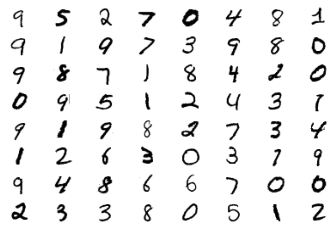

In [9]:

print("64 handwritten digits in the training set")
figure = plt.figure()
num_of_images = 64
for index in range(0, num_of_images):
    plt.subplot(8, 8, index + 1)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

Now, I'll plot the first ten digits. I want to check that our labels, or *truth values* match up with each number. 

The first 10 digits in the training set


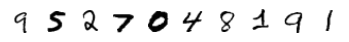

The corresponding labels are: 
tensor([9, 5, 2, 7, 0, 4, 8, 1, 9, 1])


In [14]:
print("The first 10 digits in the training set")
figure = plt.figure()
num_of_images = 10
for index in range(0, num_of_images):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')
plt.show()
print("The corresponding labels are: ")
print(labels[0:num_of_images])

# Activities for tutorial 1

Questions: 

- what is the difference between a training set and a testing set?
- how many dimensions is the `images` tensor?
- what is normalization? 
- In the last coding cell: Do the labels match the images? What datatype are the labels stored in?


Well done on finishing the first tutorial! In the next one, we'll train a mini neural network!